In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ls

all_ones.csv         items.csv            sample_submission.csv     test.csv
EDA_1st_week.ipynb   previous_values.csv  sample_submission.csv.gz  test.csv.gz
ideas.txt            sales_train.csv.gz   shops.csv
item_categories.csv  sales_train_v2.csv   submission.csv


In [3]:
train = pd.read_csv('sales_train_v2.csv')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
pd.read_csv('sample_submission.csv')

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


In [6]:
# Testing for missing values.
for col in train.columns:
    print(train[train[col].isnull()])

Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []
Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []
Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []
Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []
Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []
Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []


In [7]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [8]:
pd.read_csv('sample_submission.csv').head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [9]:
# As a first attempt/benchmark, submit the mean of item_cnt_month for each product of each shop.
means_over_train = train.groupby(['shop_id', 'item_id'],as_index=False)['item_cnt_day'].mean()
means_over_train.head()

,shop_id,item_id,item_cnt_day
0,0,30,3.444444
1,0,31,1.571429
2,0,32,1.454545
3,0,33,1.000000
4,0,35,1.250000


In [10]:
test_set = pd.read_csv('test.csv')
test_set.head(20)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [11]:
avg = means_over_train['item_cnt_day'].mean()
preds = test_set.merge(means_over_train, on=['shop_id', 'item_id'], how='left')
preds.fillna({'item_cnt_day': avg}, inplace=True)
preds.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

# pd.read_csv('sample_submission.csv')
# submission = preds['ID', 'item_cnt_month']
# submission.head()

In [12]:
submission = preds[['ID', 'item_cnt_month']]
submission.to_csv('submission.csv', index=False)
print(submission.shape)
submission.head()

(214200, 2)


,ID,item_cnt_month
0,0,1.000000
1,1,1.064066
2,2,1.111111
3,3,1.000000
4,4,1.064066


In [13]:
# Let's add year, month, day, day of week, day of month, week of year
train['date_'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
print(train['date_'].min())
print(train['date_'].max())

2013-01-01 00:00:00
2015-10-31 00:00:00


In [14]:
# Ok, so we need to predict sales for each product of each shop for November 2015.
# Adding features about time of year, week...
# Try to visualize some seasonality?
train['year'] = train['date_'].dt.year
train['month'] = train['date_'].dt.month
train['day'] = train['date_'].dt.day
train['week'] = train['date_'].dt.week
train['week_day'] = train['date_'].dt.weekday
train['year_day'] = train['date_'].dt.dayofyear

In [15]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_,year,month,day,week,week_day,year_day
2935844,10.10.2015,33,25,7409,299.0,1.0,2015-10-10,2015,10,10,41,5,283
2935845,09.10.2015,33,25,7460,299.0,1.0,2015-10-09,2015,10,9,41,4,282
2935846,14.10.2015,33,25,7459,349.0,1.0,2015-10-14,2015,10,14,42,2,287
2935847,22.10.2015,33,25,7440,299.0,1.0,2015-10-22,2015,10,22,43,3,295
2935848,03.10.2015,33,25,7460,299.0,1.0,2015-10-03,2015,10,3,40,5,276


In [16]:
mask = (train.month == 10) & (train.year == 2015)
oct_2015 = train[mask]
oct_2015 = oct_2015.groupby(['shop_id', 'item_id'], as_index=False).sum()
oct_2015_cnt = oct_2015[['shop_id', 'item_id', 'item_cnt_day']]
oct_2015_cnt.head()

,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,486,3.0
2,2,787,1.0
3,2,794,1.0
4,2,968,1.0


In [17]:
prev = test_set.merge(oct_2015_cnt, on=['shop_id', 'item_id'], how='left')
prev = prev.fillna(0)
prev['item_cnt_day'] = prev['item_cnt_day'].clip(0, 20)
preds = prev
preds.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)
preds.head()
preds = preds[['ID', 'item_cnt_month']]
preds.to_csv('previous_values.csv', index=False)
print(preds.shape)
preds

(214200, 2)


,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
5,5,1.0
6,6,2.0
7,7,0.0
8,8,0.0
9,9,0.0


In [18]:
monthly_sales = train.copy().drop(['month', 'day', 'week', 'week_day','year_day'], axis=1)
monthly_sales['date_'] = monthly_sales['date_'] + pd.DateOffset(months = 1)
monthly_sales['year'] = monthly_sales['date_'].dt.year
monthly_sales['month'] = monthly_sales['date_'].dt.month
monthly_sales = monthly_sales.groupby(['shop_id', 'item_id', 'year', 'month'], as_index=False).sum()[['shop_id', 'item_id', 'year', 'month', 'item_cnt_day']]
monthly_sales.rename(columns={'item_cnt_day': 'previous_month_item_cnt'}, inplace=True)
# monthly_sales = train.groupby(['shop_id', 'item_id', 'date_', 'year', 'month'], as_index=False).sum()[['shop_id', 'item_id', 'year', 'month', 'item_cnt_day']]
monthly_sales.head()

,shop_id,item_id,year,month,previous_month_item_cnt
0,0,30,2013,3,31.0
1,0,31,2013,3,11.0
2,0,32,2013,2,6.0
3,0,32,2013,3,10.0
4,0,33,2013,2,3.0


In [19]:
train = train.merge(monthly_sales, on=['shop_id', 'item_id', 'year', 'month'], how='left')
train['previous_month_item_cnt'] = train['previous_month_item_cnt'].fillna(0)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_,year,month,day,week,week_day,year_day,previous_month_item_cnt
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,2013,1,2,1,2,2,0.0
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,2013,1,3,1,3,3,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,2013,1,5,1,5,5,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,2013,1,6,1,6,6,0.0
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,2013,1,15,3,1,15,0.0


In [20]:
train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_,year,month,day,week,week_day,year_day,previous_month_item_cnt
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,2013,1,2,1,2,2,0.0
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,2013,1,3,1,3,3,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,2013,1,5,1,5,5,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,2013,1,6,1,6,6,0.0
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,2013,1,15,3,1,15,0.0


In [21]:
# Seasonality over year

shop_id = 25
mask = (train['year'] == 2014) & (train['shop_id'] == shop_id)
_2014 = train[mask]
gr_2014 = _2014.groupby(['month', 'day']).sum()
gr_2014 = gr_2014.sort_values('year_day')
gr_2014.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day    year  \
month day                                                                       
1     2              4404     9175  3685593  357798.035         504.0  739138   
      3              3564     7425  3213360  252621.500         386.0  598158   
      4              3204     6675  2741246  222485.000         315.0  537738   
      5              3348     6975  2838455  208449.650         331.0  561906   
      7              2412     5025  2174703  121622.000         236.0  404814   

           week  week_day  year_day  previous_month_item_cnt  
month day                                                     
1     2     367      1101       734                   4519.0  
      3     297      1188       891                   3517.0  
      4     267      1335      1068                   3564.0  
      5     279      1674      1395                   3401.0  
      7     402       201      1407                   2836.0

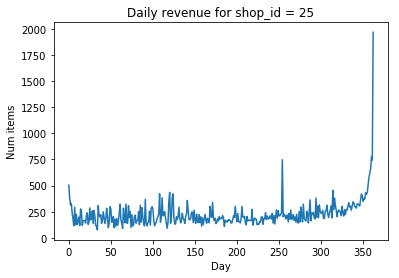

In [22]:
# total_num_items_sold = tr[(tr['month'] == 12) & (tr['year'] == 2014) & (tr['shop_id'] == shop_id)].groupby('day').sum()['item_cnt_day']
 # YOUR CODE GOES HERE
# days = tr[(tr['month'] == 12) & (tr['year'] == 2014) & (tr['shop_id'] == shop_id)].groupby('day').sum()['item_cnt_day'].index# YOUR CODE GOES HERE
# Plot it
plt.plot(gr_2014['year_day'].reset_index().index, gr_2014['item_cnt_day'])
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

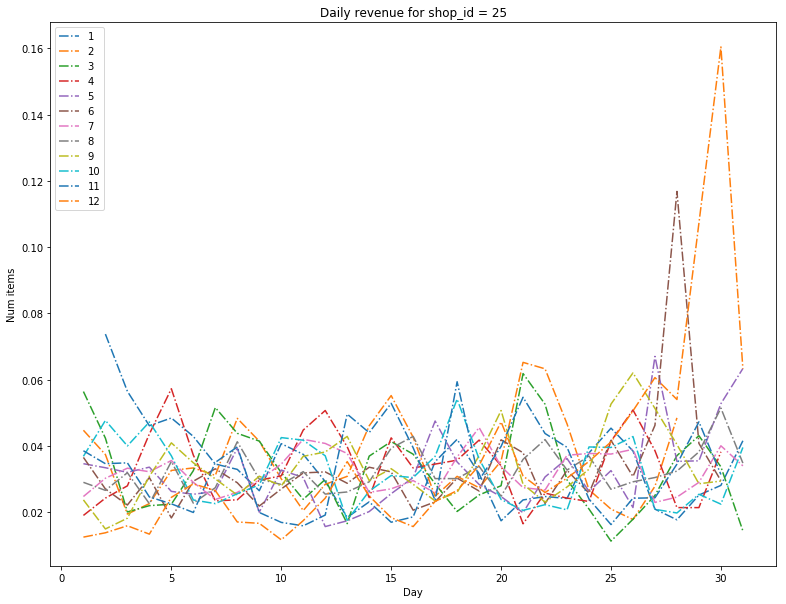

In [23]:
# Over month relative sales of month

plt.figure(figsize=(13, 10))
month_2014 = _2014.groupby(['month', 'day'], as_index=False).sum()
for month in month_2014['month'].unique():
    data_month = month_2014[month_2014['month']== month]
    plt.plot(data_month.day, data_month.item_cnt_day /  data_month.item_cnt_day.sum(), '-.')

plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.legend(month_2014['month'].unique())
plt.show()

In [24]:
import xgboost as xgb

In [25]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_,year,month,day,week,week_day,year_day,previous_month_item_cnt
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,2013,1,2,1,2,2,0.0
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,2013,1,3,1,3,3,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,2013,1,5,1,5,5,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,2013,1,6,1,6,6,0.0
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,2013,1,15,3,1,15,0.0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# read in data
train_xgb = train.drop(['item_cnt_day', 'date', 'date_'], axis=1)
target_xgb = train[['item_cnt_day']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split( train_xgb, target_xgb, test_size=0.33, shuffle=False)

In [29]:
dtrain = xgb.DMatrix(X_train.values, y_train.values)
dval = xgb.DMatrix(X_test.values, y_test.values)
dall = xgb.DMatrix(train_xgb.values, target_xgb.values)

In [30]:
# dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':7, 'eta':0.1, 'silent':0, 'objective':'reg:linear' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
# preds = bst.predict(dtest)

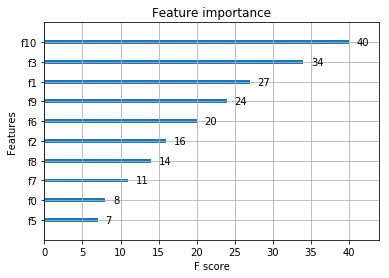

In [31]:
# feature importance
xgb.plot_importance(bst)
# plot
# plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
# plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
# ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
#              'objective': 'reg:linear'}
# optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
#                             cv_params, 
#                              cv = 5, n_jobs = -1)

In [34]:
cvresult = xgb.cv(param, dall, num_boost_round=40, nfold=5,
            metrics='rmse', shuffle=True)

In [35]:
cvresult

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,2.602238,0.613043,2.621797,0.161600
1,2.560179,0.619364,2.538115,0.149817
2,2.523291,0.624821,2.468457,0.141279
3,2.491251,0.630899,2.406014,0.134761
4,2.467790,0.634470,2.350074,0.127200
5,2.445098,0.638488,2.299805,0.119744
6,2.426809,0.641042,2.255699,0.112646
7,2.410503,0.643137,2.213510,0.105596
8,2.398645,0.643790,2.175700,0.098270
9,2.387313,0.646753,2.141637,0.093882


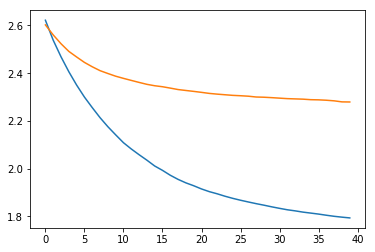

In [36]:
plt.plot(cvresult.index, cvresult['train-rmse-mean'])
plt.plot(cvresult.index, cvresult['test-rmse-mean'])

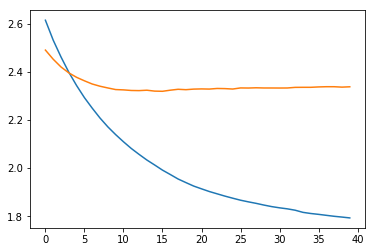

In [37]:
cvresult_no_shuffle = xgb.cv(param, dall, num_boost_round=40, nfold=5,
            metrics='rmse', shuffle=False)
plt.plot(cvresult_no_shuffle.index, cvresult_no_shuffle['train-rmse-mean'])
plt.plot(cvresult_no_shuffle.index, cvresult_no_shuffle['test-rmse-mean'])

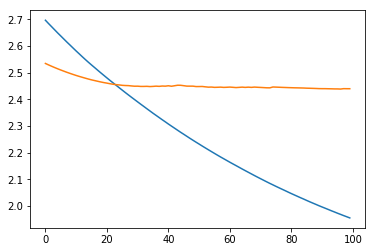

In [38]:
param_boost = {'max_depth':10, 'eta':0.01, 'silent':0, 'objective':'reg:linear', 'min_child_weight':5 }
cvresult2 = xgb.cv(param_boost, dall, num_boost_round=100, nfold=5,
            metrics='rmse', shuffle=False)
plt.plot(cvresult2.index, cvresult2['train-rmse-mean'])
plt.plot(cvresult2.index, cvresult2['test-rmse-mean'])

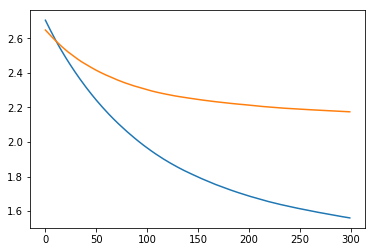

In [39]:
param_boost = {'max_depth':10, 'eta':0.01, 'silent':0, 'objective':'reg:linear' }
cvresult2_shuffle = xgb.cv(param_boost, dall, num_boost_round=150, nfold=5,
            metrics='rmse', shuffle=True)
plt.plot(cvresult2_shuffle.index, cvresult2_shuffle['train-rmse-mean'])
plt.plot(cvresult2_shuffle.index, cvresult2_shuffle['test-rmse-mean'])

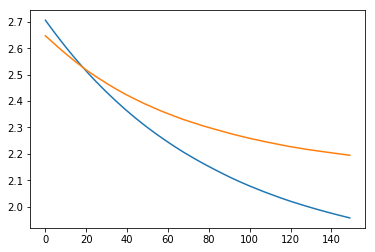

In [41]:
param_boost = {'max_depth':10, 'eta':0.01, 'silent':0, 'objective':'reg:linear', 'min_child_weight':1 }
cvresult2_shuffle = xgb.cv(param_boost, dall, num_boost_round=150, nfold=5,
            metrics='rmse', shuffle=True)
plt.plot(cvresult2_shuffle.index, cvresult2_shuffle['train-rmse-mean'])
plt.plot(cvresult2_shuffle.index, cvresult2_shuffle['test-rmse-mean'])

In [46]:
# Predict
param_boost = {'max_depth':10, 'eta':0.01, 'silent':0, 'objective':'reg:linear', 'min_child_weight':1 }
reg_model = xgb.XGBRegressor(max_depth=10, eta=0.01, silent=0, objective='reg:linear', min_child_weight=1)
reg_model.fit(train_xgb, target_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.01, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=0, subsample=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(n_jobs=-1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [6, 10],
                    'learning_rate': [0.05, 0.01],
                    'n_estimators': [50,100,200],
                    'min_child_weight': [1, 2]}, verbose=1)
clf.fit(train_xgb, target_xgb)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
